In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
cars2010 = pd.read_csv('datasets/FuelEconomy/cars2010.csv')
cars2011 = pd.read_csv('datasets/FuelEconomy/cars2011.csv')
cars2012 = pd.read_csv('datasets/FuelEconomy/cars2012.csv')

In [3]:
cars2010.head()

,Unnamed: 0,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,1088,4.7,8,AM6,28.0198,NaturallyAspirated,6,1.0,0.0,TwoWheelDriveRear,2,2,2Seaters,1.0,0.0
1,1089,4.7,8,M6,25.6094,NaturallyAspirated,6,1.0,0.0,TwoWheelDriveRear,2,2,2Seaters,1.0,0.0
2,1090,4.2,8,M6,26.8000,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
3,1091,4.2,8,AM6,25.0451,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
4,1092,5.2,10,AM6,24.8000,NaturallyAspirated,6,0.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0


In [5]:
reg = LinearRegression()
reg.fit(cars2010[['EngDispl']], cars2010['FE'])
print(f"Least square estimate: intercept = {reg.intercept_}, coefficient ={reg.coef_[0]}")

Least square estimate: intercept = 50.56322991169735, coefficient =-4.5209292791740205


In [8]:
X = np.linspace(np.min(cars2010[['EngDispl']]), np.max(cars2010[['EngDispl']]))
y = reg.predict(X)

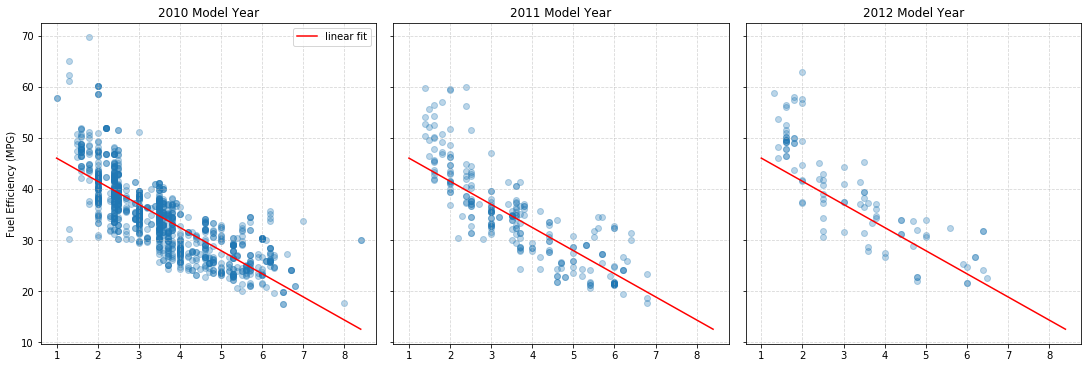

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True, sharey=True, sharex=True)

ax = axes[0]
ax.scatter(cars2010['EngDispl'], cars2010['FE'], alpha=0.3)
ax.plot(X, y, 'r', label='linear fit')
ax.set_title('2010 Model Year')
ax.set_ylabel('Fuel Efficiency (MPG)')
ax.legend(loc='upper right')


ax = axes[1]
ax.scatter(cars2011['EngDispl'], cars2011['FE'], alpha=0.3)
ax.plot(X, y, 'r')
ax.set_title('2011 Model Year')


ax = axes[2]
ax.scatter(cars2012['EngDispl'], cars2012['FE'], alpha=0.3)
ax.plot(X, y, 'r')
ax.set_title('2012 Model Year')


for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

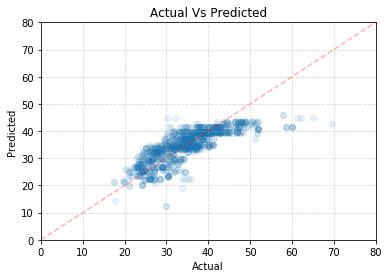

In [57]:
fig, ax = plt.subplots()

ax.scatter(cars2010['FE'], reg.predict(cars2010[['EngDispl']]), alpha=0.1)
ax.set_title('Actual Vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.grid(True, linestyle='--', alpha=0.5)

z = np.linspace(0, 80, 80)
ax.plot(z, z, 'r', linestyle='--', alpha=0.3)

ax.set_xlim(0, 80)
ax.set_ylim(0, 80)

plt.show()

In [31]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [41]:
scores = np.sqrt(np.abs(cross_val_score(reg, cars2010[['EngDispl']], cars2010['FE'], cv=10, scoring='neg_mean_squared_error')))

In [43]:
np.mean(scores)

4.727740960204629

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [53]:
quad = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad.fit(cars2010[['EngDispl']], cars2010['FE'])

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [61]:
scores = np.sqrt(np.abs(cross_val_score(quad, cars2010[['EngDispl']], cars2010['FE'], cv=10, scoring='neg_mean_squared_error')))

In [62]:
np.mean(scores)

4.345284628250471

In [63]:
X_poly = np.linspace(np.min(cars2010[['EngDispl']]), np.max(cars2010[['EngDispl']]))
y_poly = quad.predict(X)

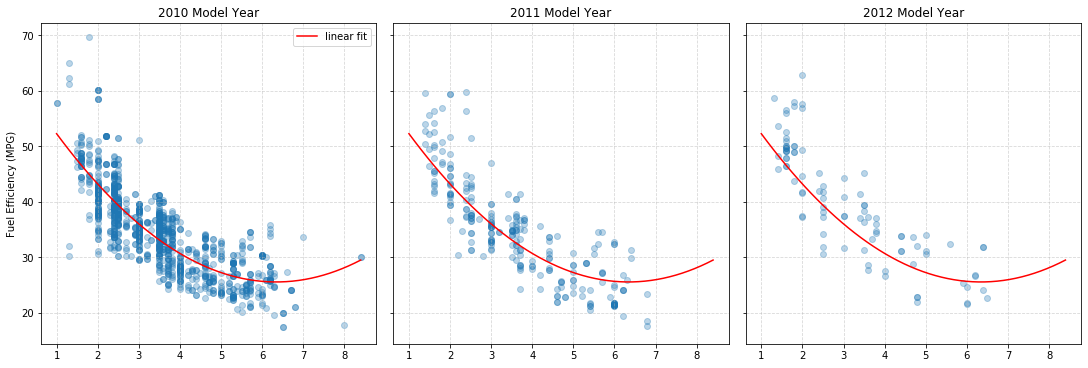

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True, sharey=True, sharex=True)

ax = axes[0]
ax.scatter(cars2010['EngDispl'], cars2010['FE'], alpha=0.3)
ax.plot(X_poly, y_poly, 'r', label='linear fit')
ax.set_title('2010 Model Year')
ax.set_ylabel('Fuel Efficiency (MPG)')
ax.legend(loc='upper right')


ax = axes[1]
ax.scatter(cars2011['EngDispl'], cars2011['FE'], alpha=0.3)
ax.plot(X_poly, y_poly, 'r')
ax.set_title('2011 Model Year')


ax = axes[2]
ax.scatter(cars2012['EngDispl'], cars2012['FE'], alpha=0.3)
ax.plot(X_poly, y_poly, 'r')
ax.set_title('2012 Model Year')


for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

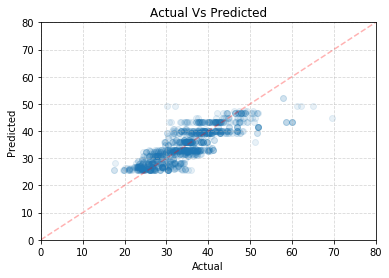

In [65]:
fig, ax = plt.subplots()

ax.scatter(cars2010['FE'], quad.predict(cars2010[['EngDispl']]), alpha=0.1)
ax.set_title('Actual Vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.grid(True, linestyle='--', alpha=0.5)

z = np.linspace(0, 80, 80)
ax.plot(z, z, 'r', linestyle='--', alpha=0.3)

ax.set_xlim(0, 80)
ax.set_ylim(0, 80)

plt.show()